In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import gym

import hiive.mdptoolbox as mdptoolbox
from hiive.mdptoolbox.mdp import ValueIteration, PolicyIteration, QLearning
from hiive.mdptoolbox.example import forest

import time

np.random.seed(44)

%matplotlib inline

In [57]:
P, R = forest(S=10, r1=4, r2=2, p=0.1)

Action 0: Wait
Action 1: Cut

# Value Iteration Policy

In [87]:
vi = ValueIteration(P, R, 0.9, max_iter=10000)
vi.setVerbose()
test = vi.run()

vi.policy

 Iteration   Variation
         1    4.000000
         2    3.240000
         3    2.624400
         4    2.125764
         5    1.721869
         6    1.394714
         7    1.129718
         8    0.915072
         9    0.741208
        10    0.600379
        11    0.486307
        12    0.393908
        13    0.319066
        14    0.214774
        15    0.173967
        16    0.000000
Iterating stopped, epsilon-optimal policy found.


(0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

In [82]:
vi.time

0.007136821746826172

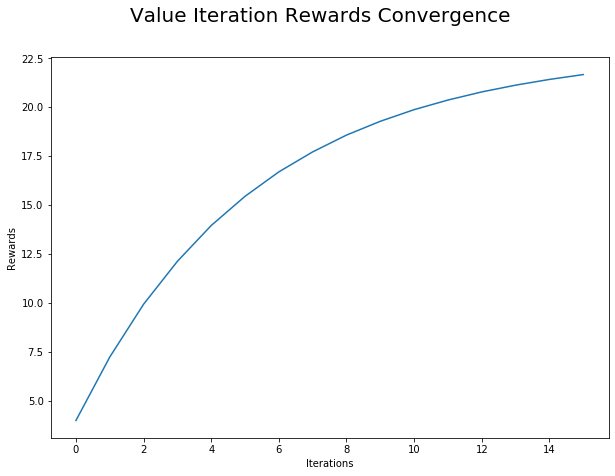

In [67]:
rewards = []

for i in range(len(test)):
    rewards.append(test[i]['Reward'])

plt.figure(figsize=(10,7))
plt.suptitle('Value Iteration Rewards Convergence', fontsize=20)
plt.xlabel('Iterations')
plt.ylabel('Rewards')
plt.plot(rewards)
# plt.savefig('FMVIConvergence.png')
plt.show()

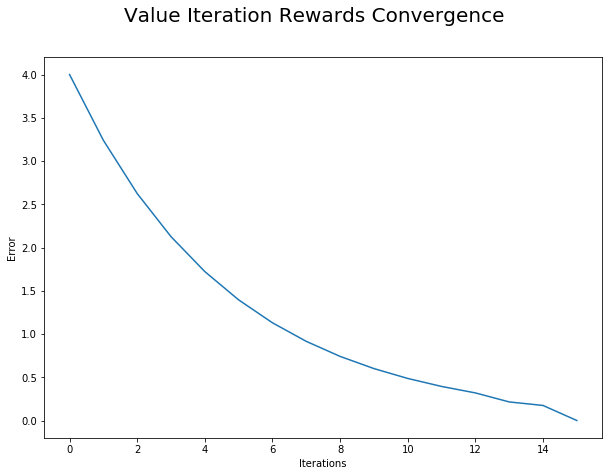

In [69]:
error = []

for i in range(len(test)):
    error.append(test[i]['Error'])

plt.figure(figsize=(10,7))
plt.suptitle('Value Iteration Rewards Convergence', fontsize=20)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.plot(error)
# plt.savefig('')
plt.show()

# Policy Iteration Policy

In [83]:
pi = PolicyIteration(P, R, 0.9)
pi.setVerbose()
test = pi.run()

pi.policy

 Iteration   Variation
         1           1
         2           1
         3           1
         4           1
         5           1
         6           1
         7           1
         8           1
         9           0
Iterating stopped, unchanging policy found.


(0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

In [84]:
pi.time

0.014346122741699219

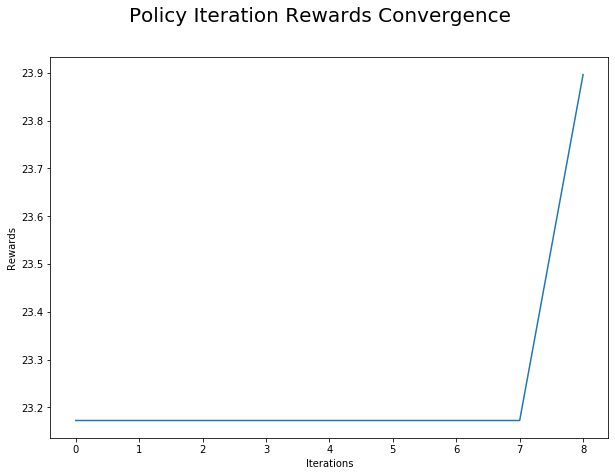

In [72]:
rewards = []

for i in range(len(test)):
    rewards.append(test[i]['Reward'])

plt.figure(figsize=(10,7))
plt.suptitle('Policy Iteration Rewards Convergence', fontsize=20)
plt.xlabel('Iterations')
plt.ylabel('Rewards')
plt.plot(rewards)
plt.savefig('FMPIConvergence.png')
plt.show()

# Q Learning Policy

In [85]:
ql = QLearning(P, R, 0.9)
test = ql.run()


In [86]:
ql.time

0.701416015625

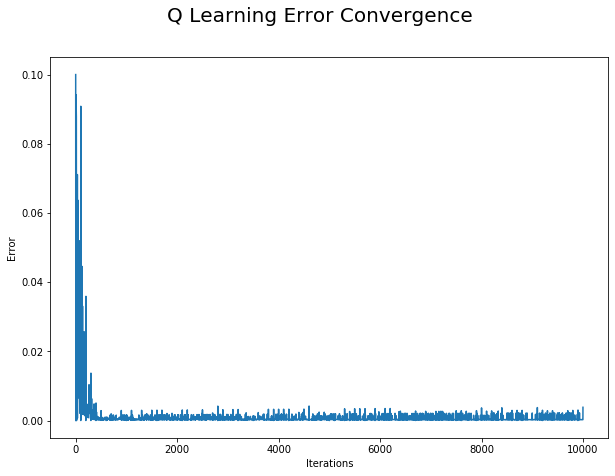

In [79]:
error = []

for i in range(len(test)):
    error.append(test[i]['Error'])

plt.figure(figsize=(10,7))
plt.suptitle('Q Learning Error Convergence', fontsize=20)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.plot(error)
# plt.savefig('FMQLConvergence.png')
plt.show()

# Discount Factor Analysis

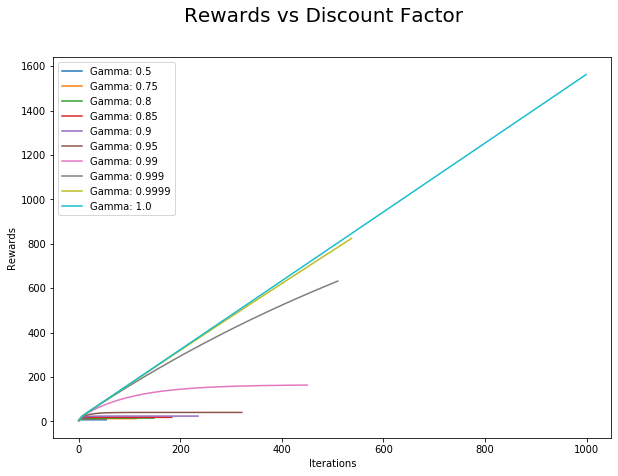

In [128]:
gammas = [0.5, 0.75, 0.8, 0.85, 0.9, 0.95, 0.99, 0.999, 0.9999, 1.0]
rewards = []


for gamma in gammas:
    vi = ValueIteration(P, R, gamma=gamma, epsilon=1e-20)
    vi.setSilent()
    test = vi.run()

    reward = []
    for i in range(len(test)):
        reward.append(test[i]['Reward'])
    
    rewards.append(reward)


plt.figure(figsize=(10,7))
plt.suptitle('Rewards vs Discount Factor', fontsize=20)
plt.xlabel('Iterations')
plt.ylabel('Rewards')
for i in range(len(rewards)):
    label = 'Gamma: ' + str(gammas[i])
    plt.plot(rewards[i], label=label)
plt.legend()

plt.savefig('FMGamma2.png')
plt.show()

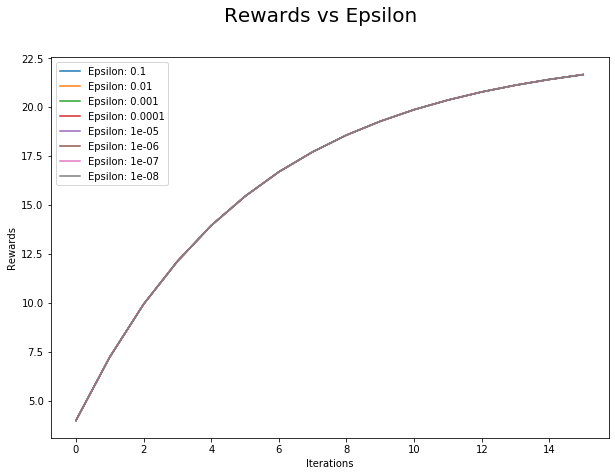

In [109]:
epsilons = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001]
rewards = []


for epsilon in epsilons:
    vi = ValueIteration(P, R, gamma=0.9, epsilon=epsilon)
    vi.setSilent()
    test = vi.run()

    reward = []
    for i in range(len(test)):
        reward.append(test[i]['Reward'])
    
    rewards.append(reward)


plt.figure(figsize=(10,7))
plt.suptitle('Rewards vs Epsilon', fontsize=20)
plt.xlabel('Iterations')
plt.ylabel('Rewards')
for i in range(len(rewards)):
    label = 'Epsilon: ' + str(epsilons[i])
    plt.plot(rewards[i], label=label)
plt.legend()

plt.savefig('FMEpsilon.png')
plt.show()

#### PI Analysis

Gamma:  0.5
Gamma:  0.75
Gamma:  0.8
Gamma:  0.85
Gamma:  0.9
Gamma:  0.95
Gamma:  0.99
Gamma:  0.999
Gamma:  0.9999


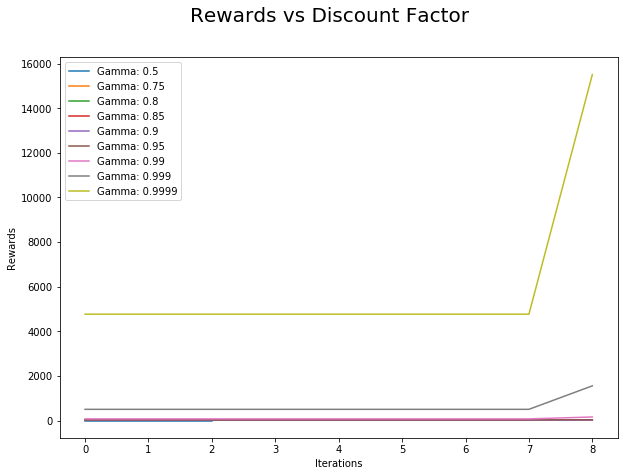

In [127]:
gammas = [0.5, 0.75, 0.8, 0.85, 0.9, 0.95, 0.99, 0.999, 0.9999]
rewards = []

for gamma in gammas:
    print("Gamma: ", gamma)
    pi = PolicyIteration(P, R, gamma)
    pi.setSilent()
    test = pi.run()

    reward = []
    for i in range(len(test)):
        reward.append(test[i]['Reward'])
    
    rewards.append(reward)


plt.figure(figsize=(10,7))
plt.suptitle('Rewards vs Discount Factor', fontsize=20)
plt.xlabel('Iterations')
plt.ylabel('Rewards')
for i in range(len(rewards)):
    label = 'Gamma: ' + str(gammas[i])
    plt.plot(rewards[i], label=label)
plt.legend()

plt.savefig('FMPIGamma.png')
plt.show()

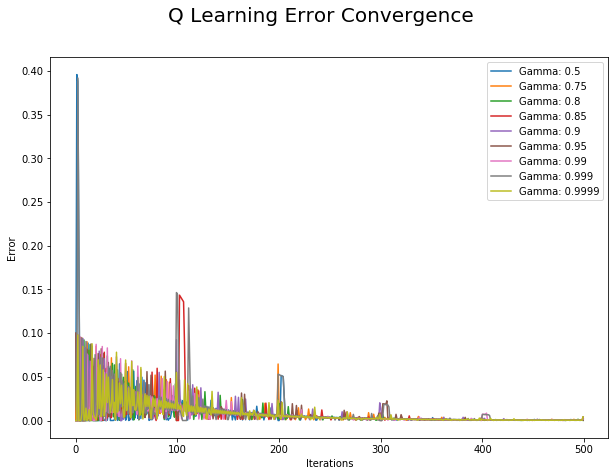

In [136]:
final_error = []
gammas = [0.5, 0.75, 0.8, 0.85, 0.9, 0.95, 0.99, 0.999, 0.9999]
for gamma in gammas:

    ql = QLearning(P, R, 0.9)
    test = ql.run()

    error = []

    for i in range(len(test)):
        error.append(test[i]['Error'])
    
    final_error.append(error)

plt.figure(figsize=(10,7))
plt.suptitle('Q Learning Error Convergence', fontsize=20)
plt.xlabel('Iterations')
plt.ylabel('Error')
for i in range(len(final_error)):
    label = 'Gamma: ' + str(gammas[i])
    plt.plot(final_error[i][0:500], label=label)
plt.legend()
plt.savefig('FMQLGamma.png')
plt.show()
